In [1]:
import PIL
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstatsπ
from tqdm.notebook import tqdm

from __future__ import print_function

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import matplotlib.patheffects as pe
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution

# Kicking horses

In [2]:
D0 = 109
D1 = 65
D2 = 22
D3 = 3
D4 = 1
N = 200


death_0 = np.zeros(N)
death_1 = np.zeros(N)
death_2 = np.zeros(N)
death_3 = np.zeros(N)
death_4 = np.zeros(N)

death_0[:D0] = 1
death_1[:D1] = 1
death_2[:D2] = 1
death_3[:D3] = 1
death_4[:D4] = 1

deaths = [0,1,2,3,4]

In [3]:
tot_0 = np.zeros(N)
tot_1 = np.zeros(N)
tot_2 = np.zeros(N)
tot_3 = np.zeros(N)
tot_4 = np.zeros(N)


for i in range(N-1):
    tot_0[i+1] = tot_0[i] + death_0[i]
    tot_1[i+1] = tot_1[i] + death_1[i]
    tot_2[i+1] = tot_2[i] + death_2[i]
    tot_3[i+1] = tot_3[i] + death_3[i]
    tot_4[i+1] = tot_4[i] + death_4[i]

In [4]:
names = np.array(['0 deaths' , '1 deaths' , '2 deaths' , '3 deaths' , '4 deaths' ])
runs = np.array([max(tot_0), max(tot_1), max(tot_2), max(tot_3), max(tot_4)])

df = pd.DataFrame(data=np.column_stack((tot_0, tot_1, tot_2, tot_3, tot_4)), columns=names)

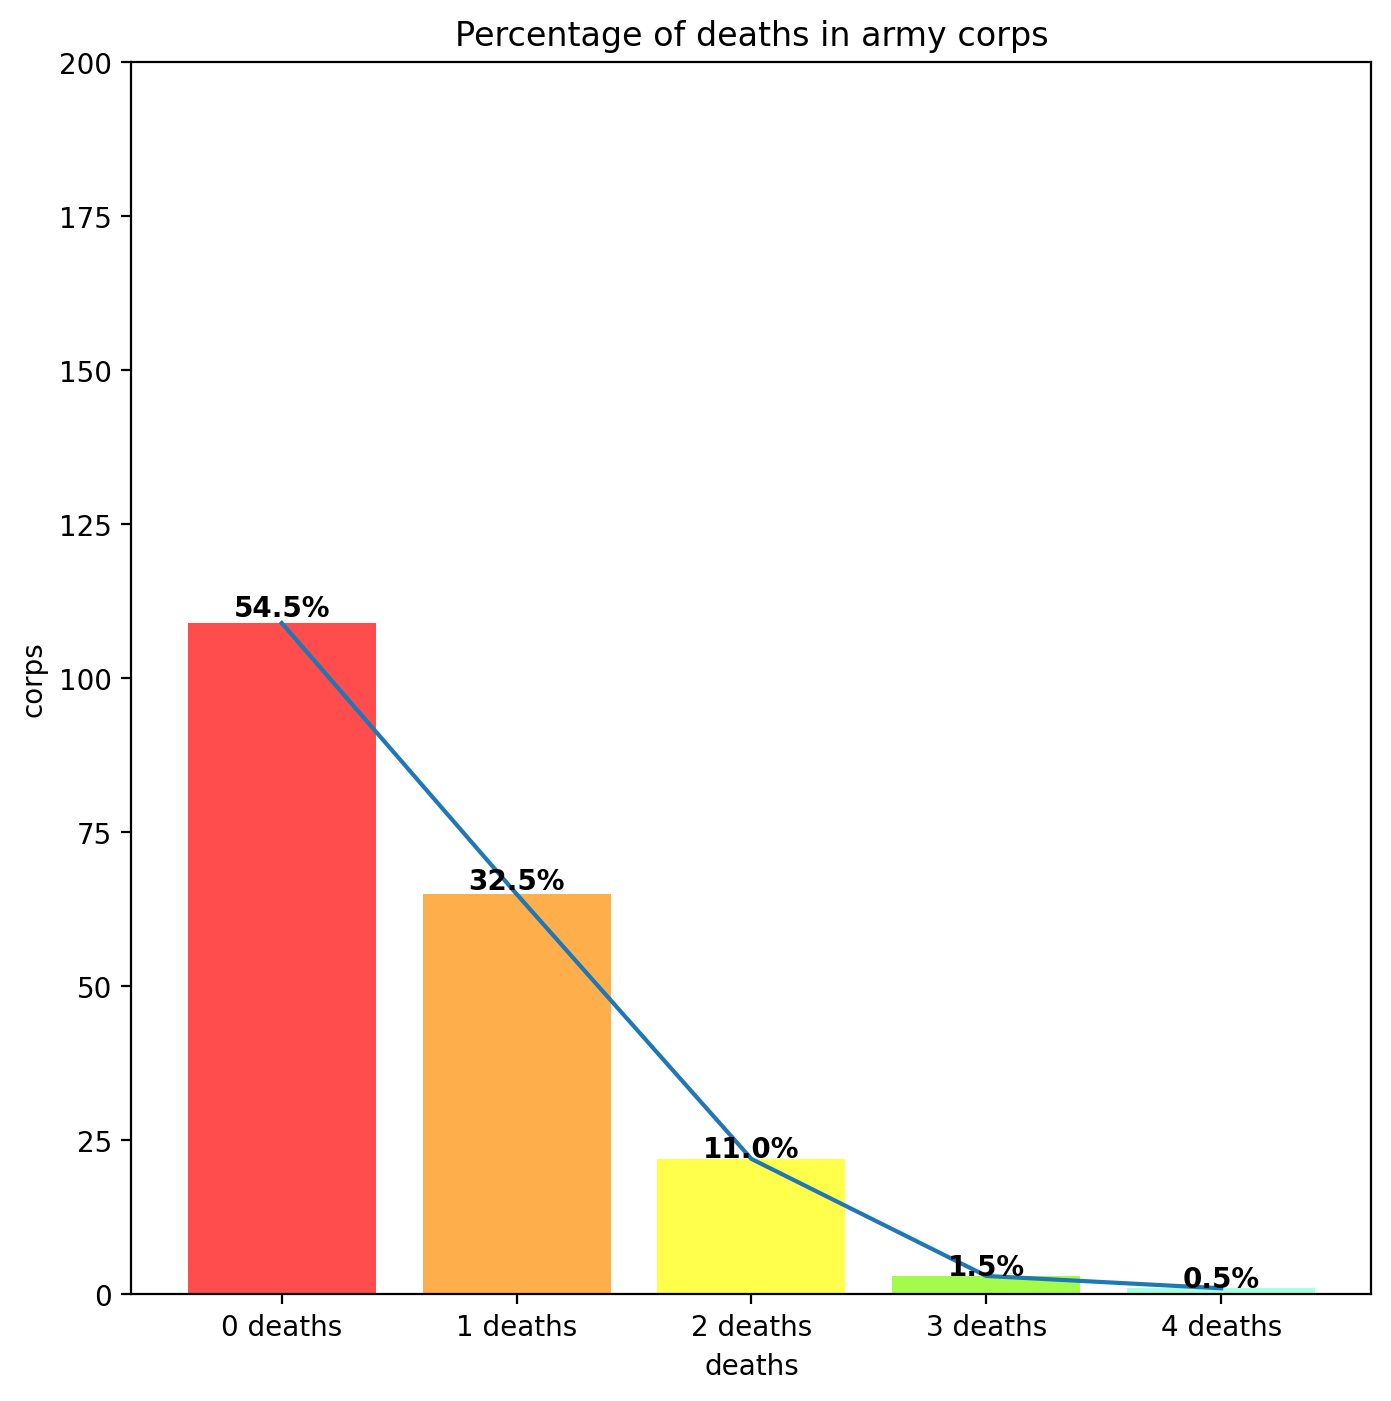

In [5]:
# compute percentage of each bar

percentage = np.zeros(df.shape[1])
for i in range(df.shape[1]):
    percentage[i] = round(runs[i]/N*100,3)

# depict illustration

plt.figure(figsize=(8,8))
colors_list = ['red', 'darkorange', 'yellow', 'lawngreen', 'aquamarine']
graph = plt.bar(names, runs,color = colors_list,alpha=0.7)
plt.xlabel("deaths")
plt.ylabel("corps")
plt.ylim(0,N)
plt.title('Percentage of deaths in army corps')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.plot(deaths, runs)    
plt.show()

## Fit by hand

It is possible to notice that the number of deaths in army corps follows a Poissonian distribution:

$$ P(k,\mu) = \frac{\mu^k}{k!}e^{-\mu}$$

with $k$ number of event (=number of deaths from 0 to 4), $f$ the frequency with which an event occurs i.e. number of times a specific event ($k_i$ deaths) happens and $\mu$ the average number of times an event occurs:

$$\mu = \frac{ \sum_{i=1}^N{k_i \cdot f_i}}{N}$$

Since it's a counting experiment, errors on the counts $f_i$ are $\sigma_f = \sqrt{f_i}$

In [6]:
def poiss(k, mu):
    poiss_i = np.zeros(len(k))
    for i in range(len(k)):
        poiss_i[i] = mu**k[i]/math.factorial(int(k[i]))*np.exp(-mu)
    return poiss_i

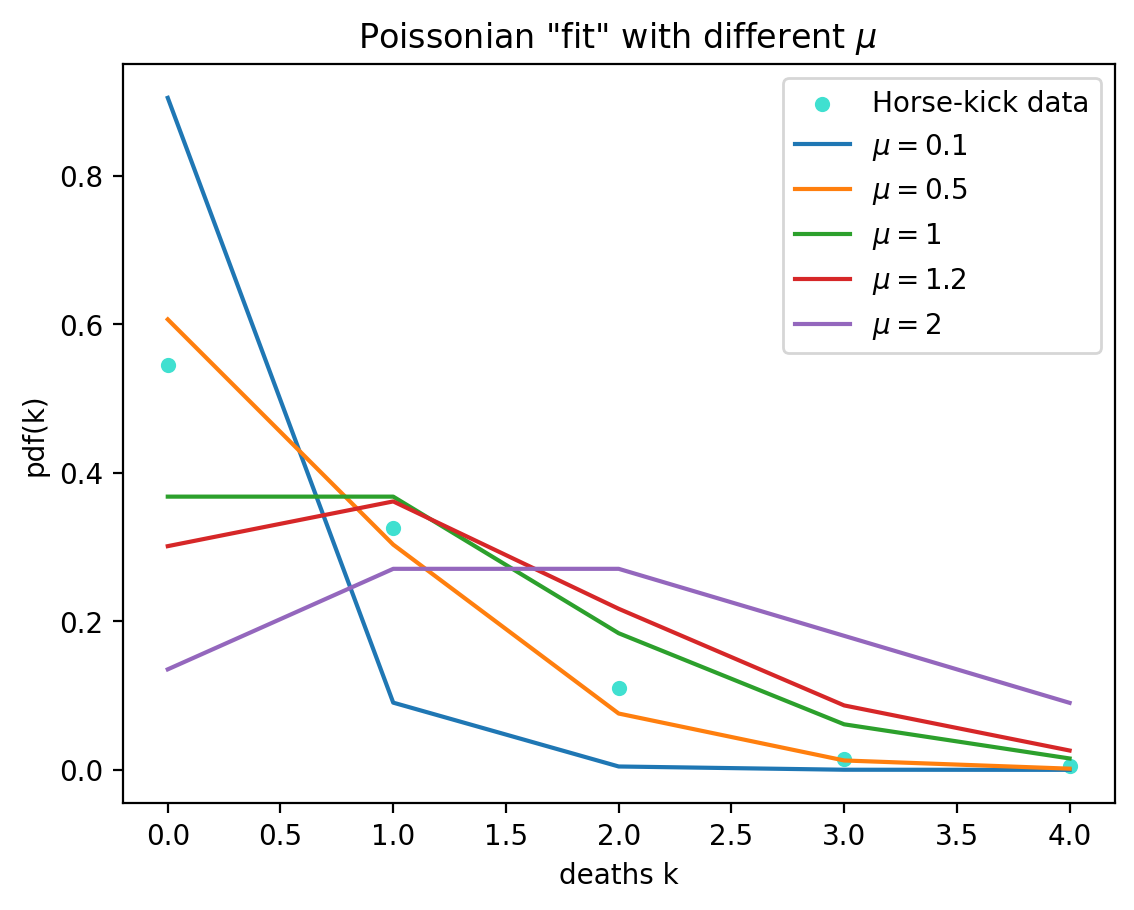

In [7]:
mu = [0.1, 0.5, 1, 1.2, 2]
freq = runs/N

plt.scatter(deaths, freq, color='turquoise',s=20,alpha=1,edgecolors='turquoise', label='Horse-kick data', zorder=1)

for i in mu:
    plt.plot(deaths, poiss(deaths, i),label='$\mu='+str(i)+"$")
plt.title('Poissonian "fit" with different $\mu$ ')
plt.xlabel('deaths k')
plt.ylabel('pdf(k)')
plt.legend()
plt.show()

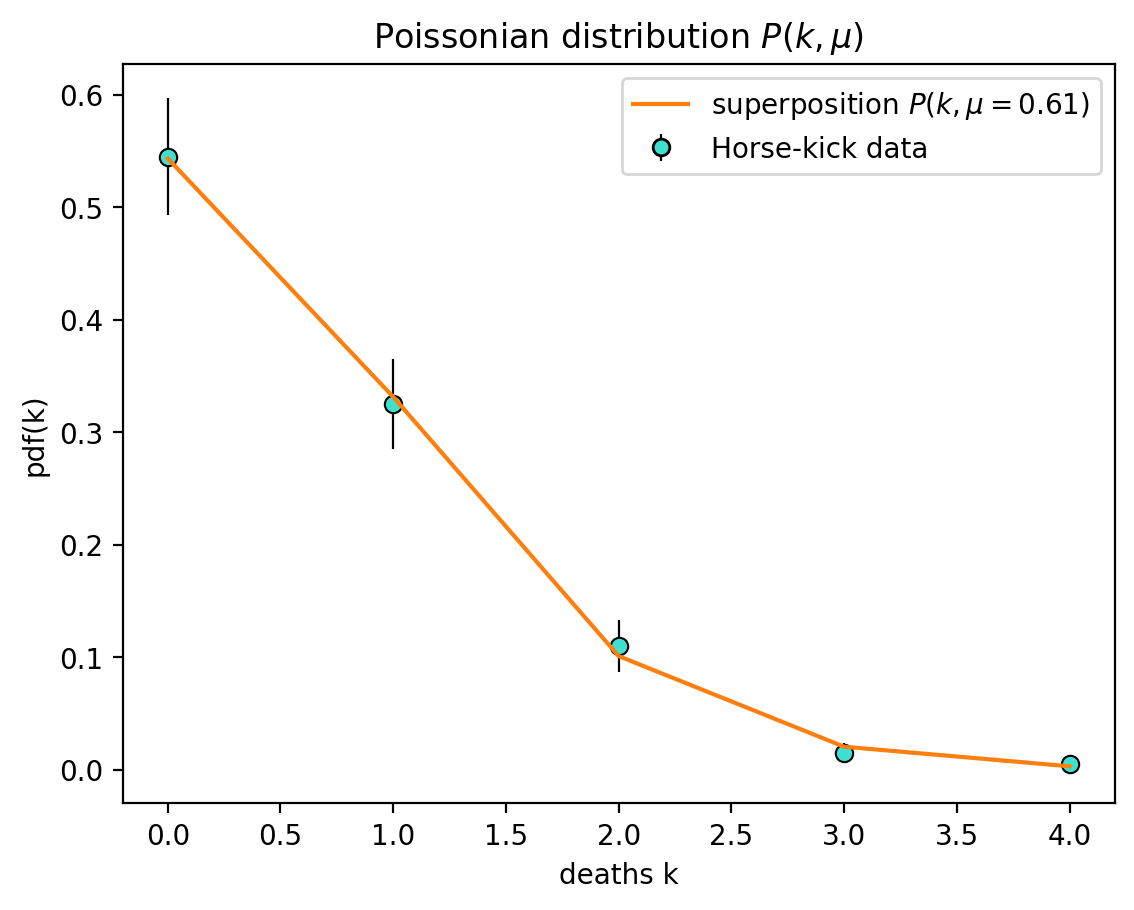

In [8]:
#compute the sample mean of the data and sample variance
mu_pois = np.sum(runs*deaths)/N
y_err = np.sqrt(runs)/N

plt.errorbar(deaths, freq, yerr=np.sqrt(runs)/N, fmt="o", ms=6, mec="black", ecolor='black', 
             mfc='turquoise', elinewidth=0.8, label='Horse-kick data', zorder=0)
plt.scatter(deaths, freq, color='turquoise',s=20,alpha=1,edgecolors='turquoise', zorder=1)
plt.plot(deaths, poiss(deaths, mu_pois),label="superposition $P(k,\mu="f"{mu_pois})$")
plt.title("Poissonian distribution $P(k,\mu)$")
plt.xlabel('deaths k')
plt.ylabel('pdf(k)')
plt.legend()
plt.show()